In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'intel-image-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F111880%2F269359%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240802%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240802T214957Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6466933f34070c7189c56f9588b1de24064c2aa8c07b58314fa8a990c554a3a2e670c37f5bc593daa7790cb6ad97d7e03ae0fca3cc47374ebc701ccf36193d40af2efb7c6fce3b167bfe800e958f5eb8052b4581747da482bfde73a4fbd4e6b54f2faa2c1fa67a7b68bfe96a786172ed2329bf88c3294b4b1bc790ef6f8ea27215a149afc1b2693af58e92043ea0ee19bec194fc47b2f7b7a9830e7260ee732c91875336364a253d7ce016ace15e54c7997a20e6c934c5a128640f339b78d9668aec29a782c0817b7fe91cbe851637d4015cbeba8bf3ebeea2c3c68304b2385f34c064506753660262b78c4c517b603ef4534ca86854af244f4611800ec45cb2'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/14986.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/3138.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/1700.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/16257.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/2863.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/771.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/12167.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/17643.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/6560.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/10162.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/4009.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/15823.jpg
/kaggle/input/intel-image-classification/seg_tr

In [ ]:
!pip install fastai

In [ ]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
data_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
data_dir

'/kaggle/input/intel-image-classification/seg_train/seg_train'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir) ## converting file path into object for easier handling
data_dir

Path('/kaggle/input/intel-image-classification/seg_train/seg_train')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[Path('/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/14986.jpg'),
 Path('/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/3138.jpg'),
 Path('/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/1700.jpg'),
 Path('/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/16257.jpg'),
 Path('/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/2863.jpg')]

#### here we counted no. of `.jpg` image files and in subdirectories represented by data_dir used `glob('*/*.jpg') to finf all `.jpg` files in any subdirectory , convert results to list and compute length using `len()` finally it displays the count of these files..

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

14034

In [ ]:
bld = list(data_dir.glob('buildings/*'))

In [ ]:
bld[:5]

[Path('/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/2193.jpg'),
 Path('/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/11378.jpg'),
 Path('/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/10730.jpg'),
 Path('/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/17338.jpg'),
 Path('/kaggle/input/intel-image-classification/seg_train/seg_train/buildings/16730.jpg')]

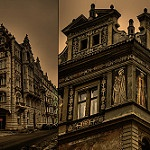

In [ ]:
PIL.Image.open(str(bld[1]))

In [ ]:
### Make a dict of images

nature_images_dict = {
    'bld': list(data_dir.glob('buildings/*')),
    'fst': list(data_dir.glob('forest/*')),
    'glc': list(data_dir.glob('glacier/*')),
    'mnt': list(data_dir.glob('mountain/*')),
    'se': list(data_dir.glob('sea/*')),
    'str': list(data_dir.glob('streat/*')),
}

In [ ]:
nature_labels_dict = {
    'bld': 0,
    'fst': 1,
    'glc': 2,
    'mnt': 3,
    'se': 4,
    'str': 5
}

In [ ]:
img = cv2.imread(str(nature_images_dict['bld'][0]))
img.shape

(150, 150, 3)

In [ ]:
## resize the images

cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [ ]:
## Getting ready w datapreprocessing

X, y = [], []
## iterate over each nature category
for nature_name, images in nature_images_dict.items():
    for image in images:
        ##read img file
        img = cv2.imread(str(image))
        ## resize img to 180x180 pixels
        resized_img = cv2.resize(img, (180, 180))
        ## appending resized images to feature list (X)
        X.append(resized_img)
        ### Appendning labels to label list (y)
        y.append(nature_labels_dict[nature_name])

In [ ]:
X = np.array(X)
y = np.array(y)

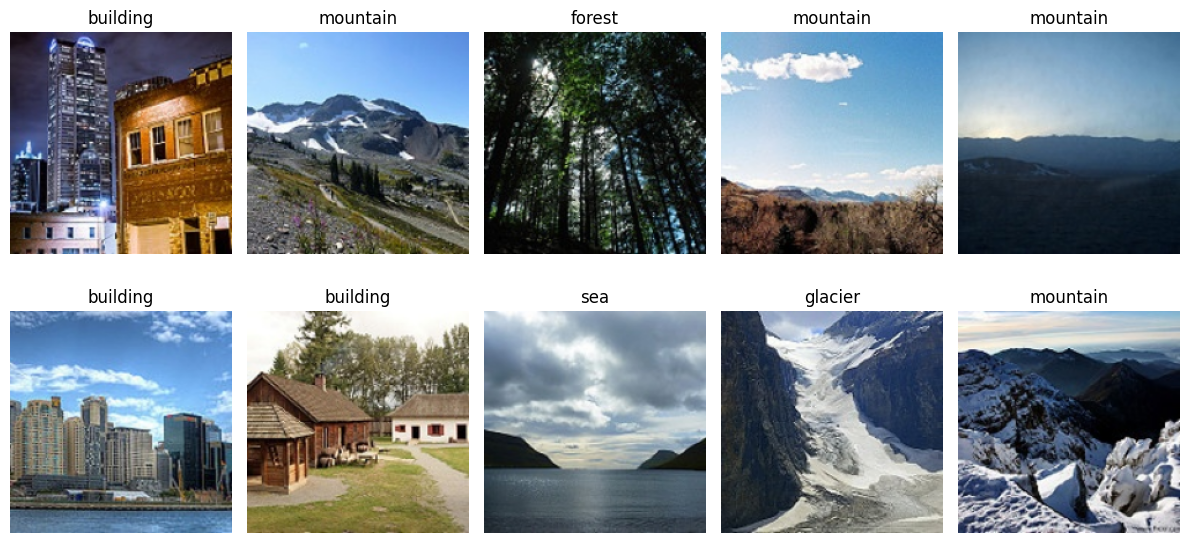

In [ ]:
### Generating random indices to select 10 images
random_indices = np.random.choice(len(X), size=10, replace=False)

class_names = {
    0: 'building',
    1: 'forest',
    2: 'glacier',
    3: 'mountain',
    4: 'sea',
    5: 'street'
}

# Display the randomly selected images with class names

plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1) # Create a 2x5 grid of subplots
    plt.imshow(cv2.cvtColor(X[idx], cv2.COLOR_BGR2RGB))
    label_index = y[idx]
    class_name = class_names[label_index]
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

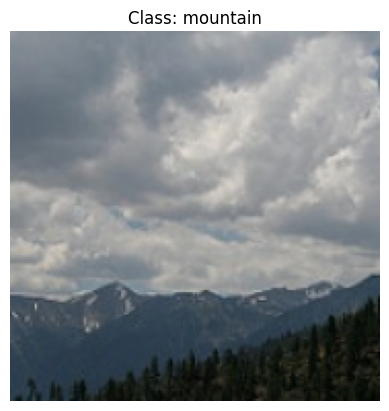

Pixel values of the image at index 9158:
[[[162 156 151]
  [160 154 149]
  [157 151 144]
  ...
  [155 144 134]
  [155 145 135]
  [156 146 136]]

 [[160 154 149]
  [158 152 147]
  [155 149 143]
  ...
  [153 143 133]
  [154 144 134]
  [155 145 135]]

 [[158 150 144]
  [156 149 143]
  [154 147 140]
  ...
  [152 143 133]
  [154 145 134]
  [156 146 136]]

 ...

 [[ 77  64  45]
  [ 77  65  47]
  [ 66  57  42]
  ...
  [  3   9   4]
  [  8  15  10]
  [  6  14   9]]

 [[ 74  62  44]
  [ 72  62  45]
  [ 55  48  33]
  ...
  [  3   9   4]
  [  7  14   9]
  [  5  12   7]]

 [[ 73  61  43]
  [ 68  59  41]
  [ 44  39  24]
  ...
  [  4  10   5]
  [  9  16  11]
  [  5  12   7]]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Chose an indx to display its image and pixel values
index_to_display = np.random.randint(len(X)) ### Choose a rand index or specify one

### Display the image
plt.imshow(cv2.cvtColor(X[index_to_display], cv2.COLOR_BGR2RGB))
plt.title(f'Class: {class_names[y[index_to_display]]}')
plt.axis('off')
plt.show()

print(f'Pixel values of the image at index {index_to_display}:')
print(X[index_to_display])

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255.0


X_test_scaled = X_test / 255.0

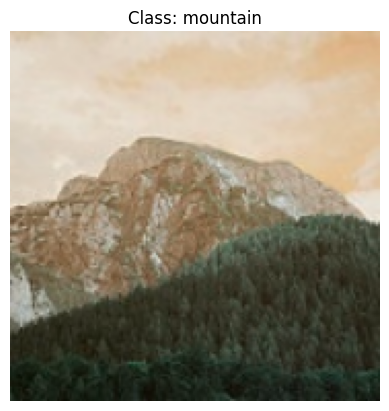

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Choose an index to display its image and scaled pixel values
index_to_display = np.random.randint(len(X))

# Display the image
plt.imshow(X_train_scaled[index_to_display])  # Display the image directly since it's already scaled
plt.title(f'Class: {class_names[y_train[index_to_display]]}')  # Display the class name as the title
plt.axis('off')  # Hide the axes for clarity
plt.show()

# Print the scaled pixel values of the image
print(f'Scaled pixel values of the image at index {index_to_display}:')
print(X_train_scaled[index_to_display])

In [ ]:
### cnn training

num_classes = 6

model = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'), # convlayer
    layers.MaxPooling2D(2, 2), ## Pooling layer
    layers.Dropout(0.25), ## Dropout layer


    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'), # convlayer
    layers.MaxPooling2D(2, 2), ## Pooling layer
    layers.Dropout(0.25), ## Dropout layer

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'), # convlayer
    layers.MaxPooling2D(2, 2), ## Pooling layer
    layers.Dropout(0.25), ## Dropout layer

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/20
  7/219 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.1680 - loss: 319.3428

I0000 00:00:1722206019.936136     664 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.2365 - loss: 42.4084 - val_accuracy: 0.3186 - val_loss: 1.6008
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4034 - loss: 1.4036 - val_accuracy: 0.3261 - val_loss: 1.4574
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4718 - loss: 1.2285 - val_accuracy: 0.5366 - val_loss: 1.1189
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5095 - loss: 1.1404 - val_accuracy: 0.5692 - val_loss: 1.0428
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5221 - loss: 1.1053 - val_accuracy: 0.5578 - val_loss: 1.0136
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5516 - loss: 1.0241 - val_accuracy: 0.6121 - val_loss: 0.9356
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5868 - loss: 0.9696 - val_accuracy: 0.6104 - val_loss: 0.9134
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6039 - loss: 0.9326 - val_accuracy: 0.6

In [ ]:
## Model eval
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7420 - loss: 0.7204
Test loss: 0.718546450138092
Test accuracy: 0.7329213619232178


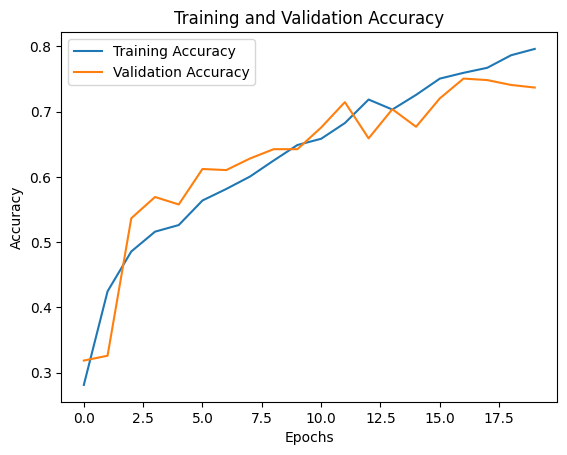

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the scaled test data
predictions = model.predict(X_test_scaled)

# Directly get the predicted class index for the first sample
predicted_class = np.argmax(predictions[0])

# Compare with the true label of the first test sample
true_class = y_test[0]  # If y_test is not one-hot encoded

# Check if the prediction matches the true class
if predicted_class == true_class:
    # Display the image using matplotlib
    plt.imshow(X_test[0], cmap='gray')  # Adjust the colormap as needed (e.g., 'gray' for grayscale images)
    plt.title(f'Predicted Class: {predicted_class}, True Class: {true_class}')
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print(f'Prediction does not match the true class. Predicted: {predicted_class}, True: {true_class}')

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
